In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'Colab Notebooks'
'CS SQL Assignment.pdf'
 Data
'Destructive Constructors.rar'
"George B. Thomas Jr., Maurice D. Weir, Joel R. Hass-Thomas' Calculus_ Early .pdf"
'Getting started.pdf'
 internship_resume.pdf
 job_resume.pdf
 N2.CPP
 plant_disease.h5
 plant_model.json
 plant_model_weights.h5
'Resume_Internship (1).pdf'
'Resume_Internship (2).pdf'
'Resume_Internship (3).pdf'
 Resume_Internship.pdf
 Resume_job.pdf
 training.gsheet
'Untitled form (1).gform'
'Untitled form.gform'
'Untitled presentation (1).gslides'
'Untitled presentation (2).gslides'
'Untitled presentation.gslides'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical 

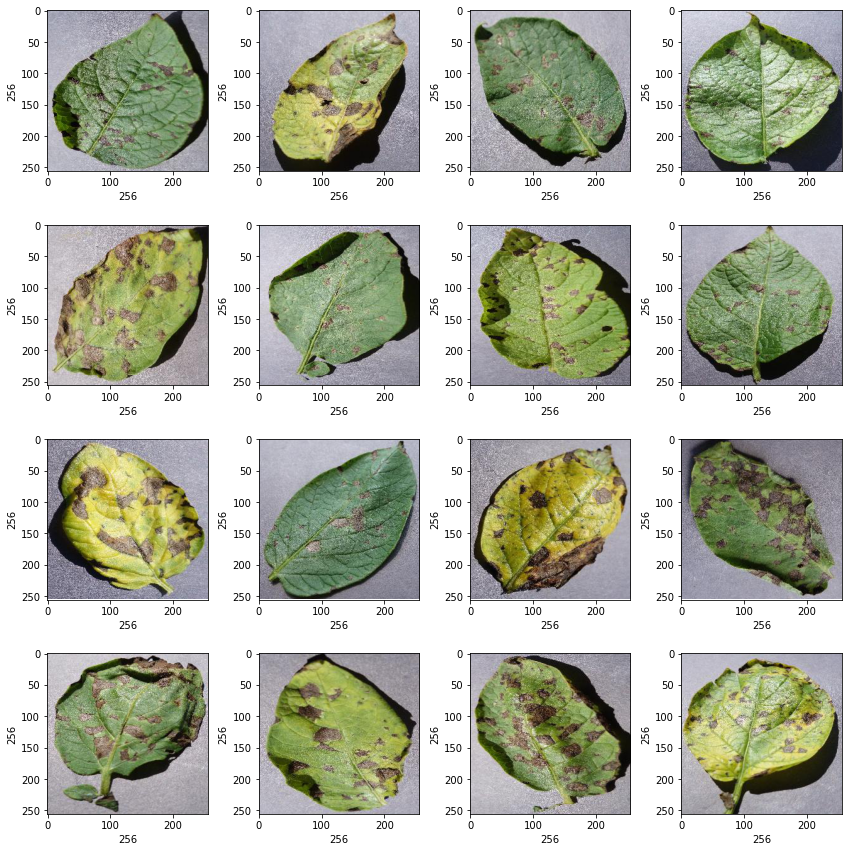

In [4]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Data/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [5]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None 

In [6]:
dir = "/content/drive/My Drive/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
# Visualize the number of classes count
#to check if dataset is balanced or not
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    300
0    300
dtype: int64

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [11]:
#normalize the dataset of our images. 
#As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 225800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [15]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [16]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 33s 464ms/step - loss: 1.0447 - accuracy: 0.4653 - val_loss: 0.9180 - val_accuracy: 0.6875
Epoch 2/50
5/5 [==============================] - 1s 206ms/step - loss: 0.8987 - accuracy: 0.6458 - val_loss: 0.7995 - val_accuracy: 0.6806
Epoch 3/50
5/5 [==============================] - 1s 202ms/step - loss: 0.7950 - accuracy: 0.6528 - val_loss: 0.6979 - val_accuracy: 0.6875
Epoch 4/50
5/5 [==============================] - 1s 196ms/step - loss: 0.7189 - accuracy: 0.6528 - val_loss: 0.6405 - val_accuracy: 0.6875
Epoch 5/50
5/5 [==============================] - 1s 193ms/step - loss: 0.6770 - accuracy: 0.6510 - val_loss: 0.6133 - val_accuracy: 0.6875
Epoch 6/50
5/5 [==============================] - 1s 197ms/step - loss: 0.6486 - accuracy: 0.6528 - val_loss: 0.5802 - val_accuracy: 0.6875
Epoch 7/50
5/5 [==============================] - 1s 196ms/step - loss: 0.6155 - accuracy: 0.6528 - val_loss: 0.5532 - val_accuracy: 0.6875
Epoch 8/50
5/5 [===

In [17]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

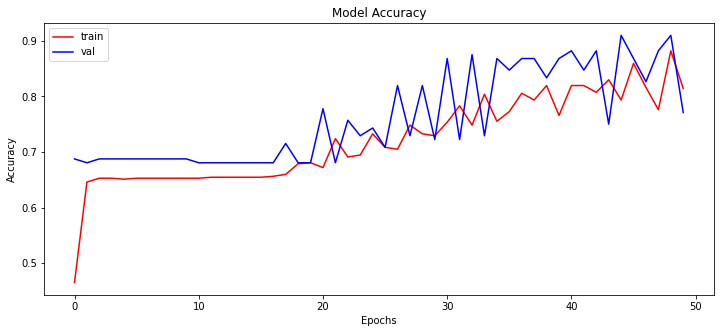

In [18]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 59ms/step - loss: 0.3464 - accuracy: 0.7889
Test Accuracy: 78.88888716697693


In [20]:
y_pred = model.predict(x_test)

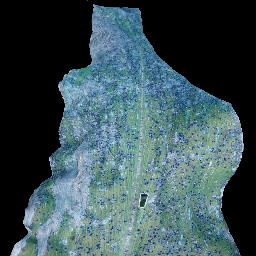

In [21]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [22]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [24]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[50])])
print("Predicted : ",all_labels[np.argmax(y_pred[50])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust


In [26]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[93])])
print("Predicted : ",all_labels[np.argmax(y_pred[93])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust


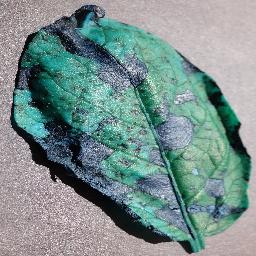

In [31]:
img = array_to_img(x_test[40])
img

In [32]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[40])])
print("Predicted : ",all_labels[np.argmax(y_pred[40])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
